## Практическое задание 7

**Выполнила**: Набережных Д.Д.

**Группа:** НПМбд-01-19

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылка на посылку в Яндекс.Контесте:

В контест https://contest.yandex.ru/contest/9963/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

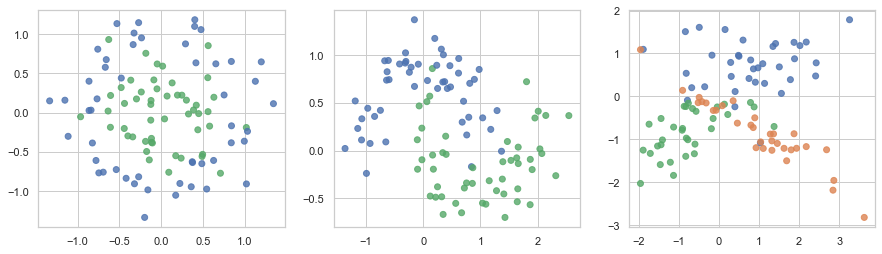

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

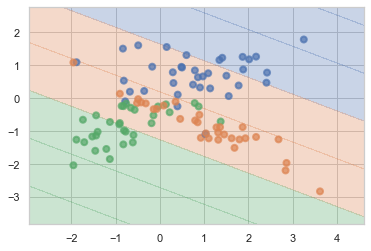

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет `make_circles`

Accuracy make_circles train: 1.0 
Accuracy make_circles test: 0.8


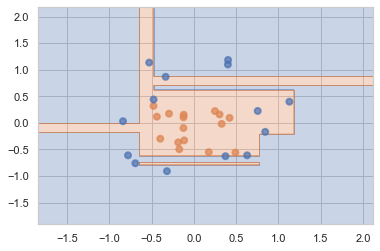

In [7]:
X1, y1 = datasets[0]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 15)
dt1 = DecisionTreeClassifier().fit(X1_train, y1_train)
plot_surface(dt1, X1_test, y1_test)
print('Accuracy make_circles train:', dt1.score(X1_train, y1_train), '\n''Accuracy make_circles test:', 
      dt1.score(X1_test, y1_test))

Датасет `make_moons`

Accuracy make_moons train: 1.0 
Accuracy make_moons test: 0.8


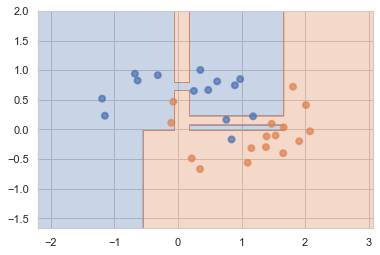

In [8]:
X2, y2 = datasets[1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 15)
dt2 = DecisionTreeClassifier().fit(X2_train, y2_train)
plot_surface(dt2, X2_test, y2_test)
print('Accuracy make_moons train:', dt2.score(X2_train, y2_train), '\n''Accuracy make_moons test:', dt2.score(X2_test, y2_test))

Датасет `classification`

Accuracy dataset3 train: 1.0 
Accuracy dataset3 test: 0.8


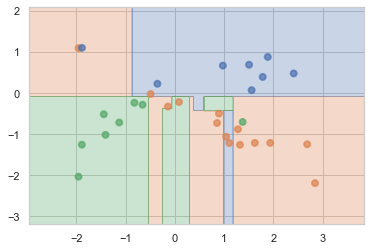

In [9]:
X3, y3 = datasets[2]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 15)
dt3 = DecisionTreeClassifier().fit(X3_train, y3_train)
plot_surface(dt3, X3_test, y3_test)
print('Accuracy dataset3 train:', dt3.score(X3_train, y3_train), '\n''Accuracy dataset3 test:', dt3.score(X3_test, y3_test))

__Ответ:__ При обучении 100% точность на всех выборках. При тестировании точность уменьшилась, так как решающие деревья переобучились.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

max_depth: 1, min_samples_leaf: 1
Датасет № 1
Train accuracy: 0.7,  Test accuracy: 0.45
Train:


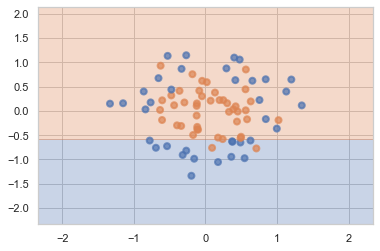

Test:


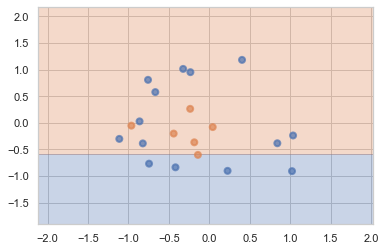

max_depth: 5, min_samples_leaf: 5
Датасет № 1
Train accuracy: 0.9125,  Test accuracy: 0.85
Train:


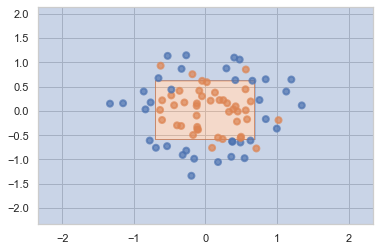

Test:


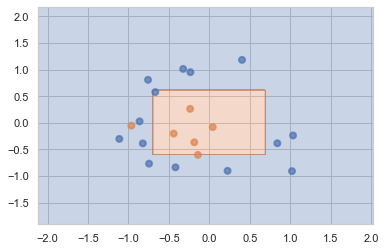

max_depth: 1, min_samples_leaf: 1
Датасет № 2
Train accuracy: 0.825,  Test accuracy: 0.85
Train:


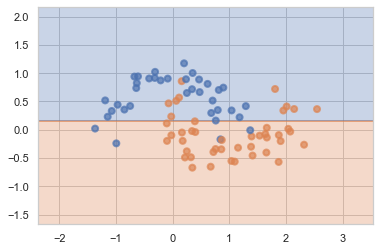

Test:


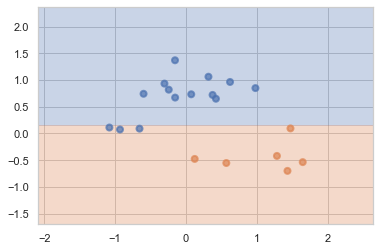

max_depth: 5, min_samples_leaf: 5
Датасет № 2
Train accuracy: 0.95,  Test accuracy: 0.8
Train:


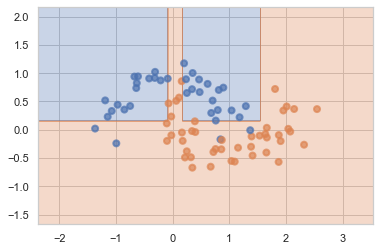

Test:


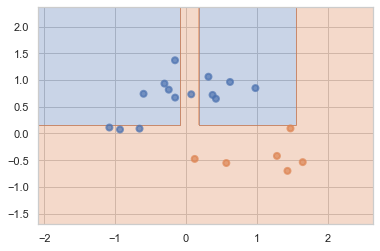

max_depth: 1, min_samples_leaf: 1
Датасет № 3
Train accuracy: 0.6625,  Test accuracy: 0.55
Train:


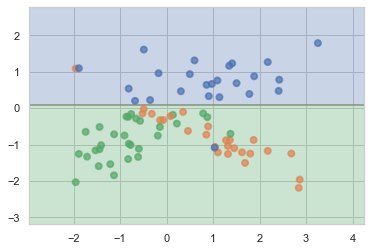

Test:


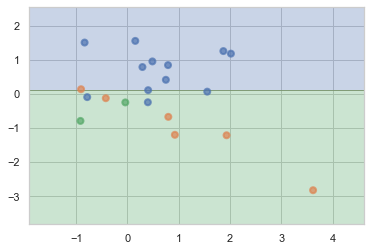

max_depth: 5, min_samples_leaf: 5
Датасет № 3
Train accuracy: 0.9,  Test accuracy: 0.7
Train:


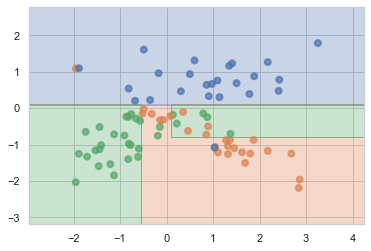

Test:


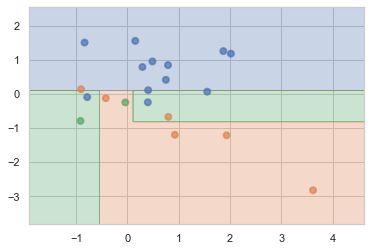

In [10]:
for i, (x, y) in enumerate(datasets):
    for depth, samples in zip(range(1,6,4),list(range(1,6,4))*2):
        X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
        print(f'max_depth: {depth}, min_samples_leaf: {samples}')
        DTC = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=samples)
        DTC.fit(X_train,y_train)
        print('Датасет №', i+1)
        print(f'Train accuracy: {accuracy_score(y_train,DTC.predict(X_train))},  Test accuracy: {accuracy_score(y_test,DTC.predict(X_test))}')
        print('Train:')
        plot_surface(DTC, X_train, y_train)
        plt.show()
        print('Test:')
        plot_surface(DTC, X_test, y_test)
        plt.show()
        print('='*50)

__Ответ:__  При увеличении гиперпараметров так же происходит увеличению точности описания выборок.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [11]:
from hw5code import find_best_split
from hw5code import DecisionTree

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [12]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [13]:
LE = LabelEncoder()
for i in range(len(mushrooms.columns)):
    mushrooms.iloc[:, i] = LE.fit_transform(mushrooms.iloc[:, i])
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [14]:
mushrooms_t = np.array(mushrooms['p'])
mushrooms_f = np.array(mushrooms.drop('p', axis = 1))
x_train, x_test, y_train, y_test = train_test_split(mushrooms_f, mushrooms_t, test_size = 0.5, random_state = 1)
DT_mushrooms = DecisionTreeClassifier().fit(x_train, y_train)
print('Test accuracy:', DT_mushrooms.score(x_test, y_test))
print('Depth:', DT_mushrooms.get_depth())

Test accuracy: 0.999015263417036
Depth: 7


__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

In [15]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [16]:
for i in range(len(tic_tac_toe.columns)):
    tic_tac_toe.iloc[:, i] = LabelEncoder().fit_transform(tic_tac_toe.iloc[:, i])
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


Text(0, 0.5, 'Accuracy')

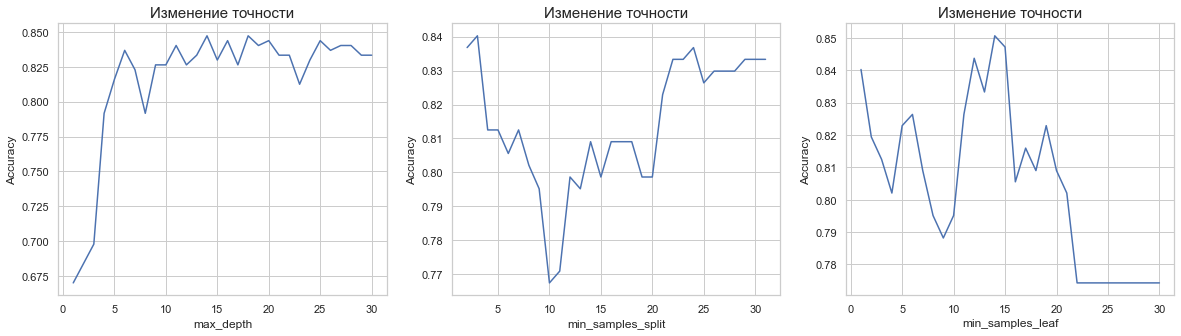

In [17]:
X = np.array(tic_tac_toe.drop('positive', axis = 1))
y = np.array(tic_tac_toe['positive'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

Accuracy_max_depth = []
Accuracy_min_samples_split = []
Accuracy_min_samples_leaf = []

for i in range(30):
    Decision_Tree_max_depth = DecisionTreeClassifier(max_depth = 1 + i).fit(X_train, y_train)
    Accuracy_max_depth.append(Decision_Tree_max_depth.score(X_test, y_test))
    
    Decision_Tree_min_samples_split = DecisionTreeClassifier(min_samples_split = 2 + i).fit(X_train, y_train)
    Accuracy_min_samples_split.append(Decision_Tree_min_samples_split.score(X_test, y_test))
    
    Decision_Tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf = 1 + i).fit(X_train, y_train)
    Accuracy_min_samples_leaf.append(Decision_Tree_min_samples_leaf.score(X_test, y_test))
    
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].plot(np.arange(1, 31), Accuracy_max_depth)
ax[0].set_title('Изменение точности', fontsize = 15)
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('Accuracy')

ax[1].plot(np.arange(2, 32), Accuracy_min_samples_split)
ax[1].set_title('Изменение точности', fontsize = 15)
ax[1].set_xlabel('min_samples_split')
ax[1].set_ylabel('Accuracy')

ax[2].plot(np.arange(1, 31), Accuracy_min_samples_leaf)
ax[2].set_title('Изменение точности', fontsize = 15)
ax[2].set_xlabel('min_samples_leaf')
ax[2].set_ylabel('Accuracy')

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [18]:
car = pd.read_csv('car.data')
print(car['unacc'].unique())
car.head()

['unacc' 'acc' 'vgood' 'good']


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [19]:
LE = LabelEncoder()
for i in range(len(car.columns)):
    car.iloc[:, i] = LE.fit_transform(car.iloc[:, i])
car_t = np.array(car['unacc'])
car_f = np.array(car.drop('unacc', axis = 1))
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [20]:
nursery = pd.read_csv('nursery.data')
print(nursery['recommend'].unique())
nursery.head()

['priority' 'not_recom' 'recommend' 'very_recom' 'spec_prior']


,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [21]:
nursery.loc[(nursery['recommend'] == 'not_recom'), 'recommend'] = 'recommend'
nursery.loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior'), 'recommend'] = 'priority'
nursery['recommend'].unique()

array(['priority', 'recommend'], dtype=object)

In [22]:
LE = LabelEncoder()
for i in range(len(nursery.columns)):
    nursery.iloc[:, i] = LE.fit_transform(nursery.iloc[:, i])
nurs_t = np.array(nursery['recommend'])
nurs_f = np.array(nursery.drop('recommend', axis = 1))
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,0
1,2,3,0,0,0,0,0,0,1
2,2,3,0,0,0,0,2,2,1
3,2,3,0,0,0,0,2,1,0
4,2,3,0,0,0,0,2,0,1


In [23]:
mushrooms_x = np.array(mushrooms.drop('p', axis = 1))
mushrooms_y = np.array(mushrooms['p'])

ttt_x = np.array(tic_tac_toe.drop('positive', axis = 1))
ttt_y = np.array(tic_tac_toe['positive'])

cars_x = np.array(car.drop('unacc', axis = 1))
cars_y = np.array(car['unacc'])

nursery_x = np.array(nursery.drop('recommend', axis = 1))
nursery_y = np.array(nursery['recommend'])

In [24]:
accuracy_mushrooms = cross_val_score(DecisionTreeClassifier(), mushrooms_x, mushrooms_y, cv=10).mean()
accuracy_tic_tac_toe = cross_val_score(DecisionTreeClassifier(), ttt_x, ttt_y, cv=10).mean()
accuracy_cars = cross_val_score(DecisionTreeClassifier(), cars_x, cars_y, cv=10).mean()
accuracy_nursery = cross_val_score(DecisionTreeClassifier(), nursery_x, nursery_y, cv=10).mean()

print('\nAccuracy mushrooms:', accuracy_mushrooms)
print('\nAccuracy tic_tac_toe:', accuracy_tic_tac_toe)
print('\nAccuracy cars:', accuracy_cars)
print('\nAccuracy nursery:', accuracy_nursery)


Accuracy mushrooms: 0.9619844400414447

Accuracy tic_tac_toe: 0.7809320175438597

Accuracy cars: 0.8657816910875118

Accuracy nursery: 0.9998456790123458
